# **SOLUTION PLANNING**

BUSINESS PROBLEM

OUTPUT / SOLUTION 

PROCESS

INPUT

# Imports

In [95]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from matplotlib.ticker     import StrMethodFormatter
from IPython.core.display  import HTML
from datetime              import datetime

from IPython.display       import Image

from scipy                 import stats      as ss
from tabulate              import tabulate

## 0.1 Helper Functions

In [96]:
def personal_settings():
    # plotly settings
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['font.size'] = 24
           
    # notebook settings
    display(HTML('<style>.container{width:90% !important;}</style>'))
    np.set_printoptions(suppress=True)
    pd.set_option('display.float_format', '{:.2f}'.format)

    # seaborn settings
    sns.set(rc={'figure.figsize':(15,10)})
    sns.set_theme(style = 'darkgrid', font_scale = 1.5)
    sns.set_palette('magma')
    
def cramer_v(x,y):
    cm = pd.crosstab(x,y).to_numpy() # contingency matriz
    chi2 = ss.chi2_contingency(cm)[0]
    n = cm.sum()
    r, k = cm.shape
    
    # bias correction
    chi2_tilda = max (0, chi2 - (k-1)*(r-1)/(n-1))
    k_tilda = k - (k-1)**2/(n-1);
    r_tilda = r - (r-1)**2/(n-1);
    
    return np.sqrt( (chi2_tilda/n) / (min (k_tilda-1, r_tilda-1)) )

In [97]:
personal_settings();

## 0.2 Loading Data

In [7]:
# reading csv
df_listings = pd.read_csv(r'data/listings.csv')
df_leads = pd.read_csv(r'data/leads.csv')

In [8]:
# merging datasets
df_raw = pd.merge(df_listings, df_leads, how='left', on='listing_id')
df_raw.head(2)

,advertiser_id,portal,bedrooms,suites,parking_spaces,unit_type,year_delivered_at,display_address_type,city,state,neighborhood,street,CEP,usable_areas,created_date,snapshot_date,listing_id,street_number,price,leads
0,3e7cced6-c11d-4677-a594-6dcfe502faf8,ZAP,2,1,1,APARTMENT,NaN,STREET,Santo André,São Paulo,Vila Alpina,Rua dos Capuchinhos,"9090640,0",57,2017-02-28 08:38:33.000,2019-05-31,b35c5dc3516e51b,"243,0",262910,NaN
1,fd4e2232-9a56-26fc-129e-4469f02a127b,ZAP,2,0,1,APARTMENT,Y,STREET,São Bernardo do Campo,São Paulo,Parque Neide,Avenida Humberto de Alencar Castelo Branco,"9850305,0",65,2018-06-19 02:32:15.000,2019-05-31,002273b112b26b0,"111,0",217722,NaN


# 1. Data Description

In [9]:
df1=df_raw.copy()

## 1.1 Renaming Columns

In [10]:
# checking columns names
print(df1.columns)

# === note: nothing to change

Index(['advertiser_id', 'portal', 'bedrooms', 'suites', 'parking_spaces',
       'unit_type', 'year_delivered_at', 'display_address_type', 'city',
       'state', 'neighborhood', 'street', 'CEP', 'usable_areas',
       'created_date', 'snapshot_date', 'listing_id', 'street_number', 'price',
       'leads'],
      dtype='object')


In [11]:
# reordering columns
df1 = df1[['advertiser_id', 'portal', 'bedrooms', 'suites', 'parking_spaces', 'usable_areas', 'price',
           'unit_type', 'display_address_type', 'state', 'city', 'neighborhood', 'street', 'street_number', 'CEP', 
           'year_delivered_at', 'created_date', 'snapshot_date', 'listing_id', 'leads']]

## 1.2 Data Dimension

In [12]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number of rows: 242625
Number of columns: 20


## 1.3 Data Types

In [13]:
display(df1.head(3))
df1.dtypes

,advertiser_id,portal,bedrooms,suites,parking_spaces,usable_areas,price,unit_type,display_address_type,state,city,neighborhood,street,street_number,CEP,year_delivered_at,created_date,snapshot_date,listing_id,leads
0,3e7cced6-c11d-4677-a594-6dcfe502faf8,ZAP,2,1,1,57,262910,APARTMENT,STREET,São Paulo,Santo André,Vila Alpina,Rua dos Capuchinhos,"243,0","9090640,0",NaN,2017-02-28 08:38:33.000,2019-05-31,b35c5dc3516e51b,NaN
1,fd4e2232-9a56-26fc-129e-4469f02a127b,ZAP,2,0,1,65,217722,APARTMENT,STREET,São Paulo,São Bernardo do Campo,Parque Neide,Avenida Humberto de Alencar Castelo Branco,"111,0","9850305,0",Y,2018-06-19 02:32:15.000,2019-05-31,002273b112b26b0,NaN
2,8dc8fb55-64fc-f393-6620-7e74b39c48ee,ZAP,4,2,4,216,1133798,APARTMENT,STREET,São Paulo,Santo André,Vila Bastos,NaN,NaN,NaN,Y,2015-06-30 02:02:48.000,2019-05-31,2ced8967651218f,NaN


advertiser_id            object
portal                   object
bedrooms                  int64
suites                    int64
parking_spaces            int64
usable_areas              int64
price                     int64
unit_type                object
display_address_type     object
state                    object
city                     object
neighborhood             object
street                   object
street_number            object
CEP                      object
year_delivered_at        object
created_date             object
snapshot_date            object
listing_id               object
leads                   float64
dtype: object

## 1.4 Checking NA

In [14]:
df1.isna().sum()

advertiser_id                0
portal                       0
bedrooms                     0
suites                       0
parking_spaces               0
usable_areas                 0
price                        0
unit_type                    0
display_address_type         0
state                        0
city                         0
neighborhood                 0
street                   14031
street_number            82288
CEP                      13517
year_delivered_at       230971
created_date                 0
snapshot_date                0
listing_id                   0
leads                   220665
dtype: int64

## 1.5 Filling out NA

In [15]:
# data attributes that need to have NAs filled:
    # street                   14031
    # street_number            82288
    # CEP                      13517
    # year_delivered_at       230971
    # leads                   220665

### Filling: 'street', 'street_number' and 'CEP'

In [16]:
# assessing data
df1[ (df1['street'].isna()) | (df1['street_number'].isna()) | (df1['CEP'].isna()) ][[
    'display_address_type', 'city', 'state', 'neighborhood', 'street', 'street_number', 'CEP']].head(15)

# === note: cannot fill this NA values for now

,display_address_type,city,state,neighborhood,street,street_number,CEP
2,STREET,Santo André,São Paulo,Vila Bastos,NaN,NaN,NaN
5,STREET,São Bernardo do Campo,São Paulo,Centro,Rua Brasílio Machado,NaN,"9715140,0"
6,STREET,São Bernardo do Campo,São Paulo,Baeta Neves,Rua Amparo,NaN,"9751350,0"
21,STREET,São Caetano do Sul,São Paulo,Santa Paula,Alameda São Caetano,NaN,"9560050,0"
22,STREET,São Bernardo do Campo,São Paulo,Rudge Ramos,Avenida Caminho do Mar,NaN,"9611000,0"
23,STREET,São Bernardo do Campo,São Paulo,Anchieta,Avenida Senador Vergueiro,NaN,"9601000,0"
24,STREET,São Bernardo do Campo,São Paulo,Conjunto Residencial Brasilia,Rua Chuí,NaN,"9715320,0"
25,STREET,São Bernardo do Campo,São Paulo,Santa Terezinha,Rua Padre Tarcísio Zanotti,NaN,"9781270,0"
27,STREET,São Bernardo do Campo,São Paulo,Conjunto Residencial Brasilia,Rua Chuí,NaN,"9715320,0"
28,STREET,São Bernardo do Campo,São Paulo,Rudge Ramos,Avenida Caminho do Mar,NaN,"9611000,0"


### Filling: 'year_delivered_at'

In [17]:
# assessing data
display(df1[['portal', 'year_delivered_at', 'created_date']].head())
print('Unique values for this variable:', df1['year_delivered_at'].unique())

,portal,year_delivered_at,created_date
0,ZAP,NaN,2017-02-28 08:38:33.000
1,ZAP,Y,2018-06-19 02:32:15.000
2,ZAP,Y,2015-06-30 02:02:48.000
3,ZAP,NaN,2018-09-07 01:54:42.000
4,ZAP,NaN,2018-05-24 08:21:39.000


Unique values for this variable: [nan 'Y']


In [18]:
# deriving 'year' from 'created_date' on a new column // var def.: "ano de construção do anúncio"
df1['created_date'] = df1.apply(lambda x: datetime.strptime(x['created_date'], '%Y-%m-%d %H:%M:%S.%f'), axis=1) # changing data type from object to datetime
df1['created_year'] = df1['created_date'].dt.year # creating new column with ad year information
df1 = df1.drop(columns=['year_delivered_at']) # dropping column
df1.head()

,advertiser_id,portal,bedrooms,suites,parking_spaces,usable_areas,price,unit_type,display_address_type,state,city,neighborhood,street,street_number,CEP,created_date,snapshot_date,listing_id,leads,created_year
0,3e7cced6-c11d-4677-a594-6dcfe502faf8,ZAP,2,1,1,57,262910,APARTMENT,STREET,São Paulo,Santo André,Vila Alpina,Rua dos Capuchinhos,"243,0","9090640,0",2017-02-28 08:38:33,2019-05-31,b35c5dc3516e51b,NaN,2017
1,fd4e2232-9a56-26fc-129e-4469f02a127b,ZAP,2,0,1,65,217722,APARTMENT,STREET,São Paulo,São Bernardo do Campo,Parque Neide,Avenida Humberto de Alencar Castelo Branco,"111,0","9850305,0",2018-06-19 02:32:15,2019-05-31,002273b112b26b0,NaN,2018
2,8dc8fb55-64fc-f393-6620-7e74b39c48ee,ZAP,4,2,4,216,1133798,APARTMENT,STREET,São Paulo,Santo André,Vila Bastos,NaN,NaN,NaN,2015-06-30 02:02:48,2019-05-31,2ced8967651218f,NaN,2015
3,22a04bb6-3cea-6e5b-c02b-4352e7bba9cb,ZAP,3,1,1,93,904,APARTMENT,STREET,São Paulo,São Bernardo do Campo,Centro,Rua Brasílio Machado,"926,0","9715140,0",2018-09-07 01:54:42,2019-05-31,3b68be523cc0716,NaN,2018
4,3e7cced6-c11d-4677-a594-6dcfe502faf8,ZAP,3,3,3,180,1314549,APARTMENT,STREET,São Paulo,Santo André,Centro,Avenida Portugal,"639,0","9041320,0",2018-05-24 08:21:39,2019-05-31,22aee6e91d6c313,1.00,2018


### Filling: 'leads'

In [19]:
# assessing data
display(df1[['advertiser_id', 'portal', 'listing_id', 'leads']].head(10))

,advertiser_id,portal,listing_id,leads
0,3e7cced6-c11d-4677-a594-6dcfe502faf8,ZAP,b35c5dc3516e51b,NaN
1,fd4e2232-9a56-26fc-129e-4469f02a127b,ZAP,002273b112b26b0,NaN
2,8dc8fb55-64fc-f393-6620-7e74b39c48ee,ZAP,2ced8967651218f,NaN
3,22a04bb6-3cea-6e5b-c02b-4352e7bba9cb,ZAP,3b68be523cc0716,NaN
4,3e7cced6-c11d-4677-a594-6dcfe502faf8,ZAP,22aee6e91d6c313,1.00
5,cc2a9c9a-1d30-a07d-2a53-ad59e578af1e,ZAP,ac1dca8f44d4f8f,NaN
6,cc2a9c9a-1d30-a07d-2a53-ad59e578af1e,ZAP,107043366d10cf2,NaN
7,e2ab00ac-a182-e769-5e4a-d690bee045a8,ZAP,2cb5b580fc2e4df,2.00
8,95f9d519-3574-62f7-53e6-f02b580c6081,ZAP,b0231e45ff13a15,NaN
9,8dc8fb55-64fc-f393-6620-7e74b39c48ee,ZAP,35b5b13a252a11b,NaN


In [20]:
# inputing '0' to NA values assuming it meant the ad had no lead
df1['leads'] = df1.apply(lambda x: 0 if pd.isna(x['leads']) else x['leads'], axis=1)
display(df1[['advertiser_id', 'portal', 'listing_id', 'leads']].head(10))

,advertiser_id,portal,listing_id,leads
0,3e7cced6-c11d-4677-a594-6dcfe502faf8,ZAP,b35c5dc3516e51b,0.00
1,fd4e2232-9a56-26fc-129e-4469f02a127b,ZAP,002273b112b26b0,0.00
2,8dc8fb55-64fc-f393-6620-7e74b39c48ee,ZAP,2ced8967651218f,0.00
3,22a04bb6-3cea-6e5b-c02b-4352e7bba9cb,ZAP,3b68be523cc0716,0.00
4,3e7cced6-c11d-4677-a594-6dcfe502faf8,ZAP,22aee6e91d6c313,1.00
5,cc2a9c9a-1d30-a07d-2a53-ad59e578af1e,ZAP,ac1dca8f44d4f8f,0.00
6,cc2a9c9a-1d30-a07d-2a53-ad59e578af1e,ZAP,107043366d10cf2,0.00
7,e2ab00ac-a182-e769-5e4a-d690bee045a8,ZAP,2cb5b580fc2e4df,2.00
8,95f9d519-3574-62f7-53e6-f02b580c6081,ZAP,b0231e45ff13a15,0.00
9,8dc8fb55-64fc-f393-6620-7e74b39c48ee,ZAP,35b5b13a252a11b,0.00


### Final check and reordering columns

In [21]:
df1.isna().sum()

advertiser_id               0
portal                      0
bedrooms                    0
suites                      0
parking_spaces              0
usable_areas                0
price                       0
unit_type                   0
display_address_type        0
state                       0
city                        0
neighborhood                0
street                  14031
street_number           82288
CEP                     13517
created_date                0
snapshot_date               0
listing_id                  0
leads                       0
created_year                0
dtype: int64

In [22]:
df1.columns

Index(['advertiser_id', 'portal', 'bedrooms', 'suites', 'parking_spaces',
       'usable_areas', 'price', 'unit_type', 'display_address_type', 'state',
       'city', 'neighborhood', 'street', 'street_number', 'CEP',
       'created_date', 'snapshot_date', 'listing_id', 'leads', 'created_year'],
      dtype='object')

In [23]:
df1 = df1[['advertiser_id', 'portal', 'bedrooms', 'suites', 'parking_spaces', 'usable_areas', 
           'price', 'unit_type', 'display_address_type', 'state', 'city', 'neighborhood',
           'street', 'street_number', 'CEP',  'created_date', 'created_year', 
           'snapshot_date', 'listing_id', 'leads']]

## 1.6 Changing Variables Types

In [24]:
display(df1.head(2))
df1.dtypes

,advertiser_id,portal,bedrooms,suites,parking_spaces,usable_areas,price,unit_type,display_address_type,state,city,neighborhood,street,street_number,CEP,created_date,created_year,snapshot_date,listing_id,leads
0,3e7cced6-c11d-4677-a594-6dcfe502faf8,ZAP,2,1,1,57,262910,APARTMENT,STREET,São Paulo,Santo André,Vila Alpina,Rua dos Capuchinhos,"243,0","9090640,0",2017-02-28 08:38:33,2017,2019-05-31,b35c5dc3516e51b,0.00
1,fd4e2232-9a56-26fc-129e-4469f02a127b,ZAP,2,0,1,65,217722,APARTMENT,STREET,São Paulo,São Bernardo do Campo,Parque Neide,Avenida Humberto de Alencar Castelo Branco,"111,0","9850305,0",2018-06-19 02:32:15,2018,2019-05-31,002273b112b26b0,0.00


advertiser_id                   object
portal                          object
bedrooms                         int64
suites                           int64
parking_spaces                   int64
usable_areas                     int64
price                            int64
unit_type                       object
display_address_type            object
state                           object
city                            object
neighborhood                    object
street                          object
street_number                   object
CEP                             object
created_date            datetime64[ns]
created_year                     int64
snapshot_date                   object
listing_id                      object
leads                          float64
dtype: object

In [25]:
# data attributes that need to have its type changed:
    # street_number                   object
    # CEP                             object
    # snapshot_date                   object
    # leads                          float64

### Changing 'street_number '

In [26]:
print('var type before:', df1['street_number'].dtypes)

df1['street_number'] = df1['street_number'].str.replace(',0', '', regex=False) # deleting comma character and zero
df1['street_number'] = df1['street_number'].fillna(0, inplace=False) # filling NA values with 0
df1['street_number'] = df1['street_number'].astype('int64') # changing data type to integer

print('var type after:', df1['street_number'].dtypes)

var type before: object
var type after: int64


### Changing 'CEP'

In [27]:
print('var type before:', df1['CEP'].dtypes)

df1['CEP'] = df1['CEP'].str.replace(',0', '', regex=False) # deleting comma character and zero
df1['CEP'] = df1['CEP'].fillna(0, inplace=False) # filling NA values with 0
df1['CEP'] = df1['CEP'].astype('int64') # changing data type to integer

print('var type after:', df1['CEP'].dtypes)

var type before: object
var type after: int64


### Changing 'snapshot_date'

In [28]:
print('var type before:', df1['snapshot_date'].dtypes)

df1['snapshot_date'] = df1.apply(lambda x: datetime.strptime(x['snapshot_date'], '%Y-%m-%d'), axis=1)

print('var type after:', df1['snapshot_date'].dtypes)

var type before: object
var type after: datetime64[ns]


### Changing 'leads'

In [29]:
print('var type before:', df1['leads'].dtypes)

df1['leads'] = df1['leads'].astype('int64')

print('var type after:', df1['leads'].dtypes)

var type before: float64
var type after: int64


### Final Check

In [30]:
df1[['street_number', 'CEP', 'snapshot_date', 'leads']].dtypes

street_number             int64
CEP                       int64
snapshot_date    datetime64[ns]
leads                     int64
dtype: object

## 1.7 Dropping Duplicates 

In [31]:
print('Number of registers:', df1.shape[0])
print('Number of unique ads:', df1['listing_id'].unique().shape[0])

# === note: no duplicates ads to drop

Number of registers: 242625
Number of unique ads: 242625


## 1.8 Descriptive Statistics

In [32]:
num_df1 = df1.select_dtypes(include=['int64','float64']) # numerical attributes
cat_df1 = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]']) # categorical attributes

### Numerical Attributes

In [33]:
# central tendendy - mean, median
ct1 = pd.DataFrame(num_df1.apply(np.mean)).T
ct2 = pd.DataFrame(num_df1.apply(np.median)).T

# dispersion - standard, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_df1.apply(np.std)).T
d2 = pd.DataFrame(num_df1.apply(min)).T
d3 = pd.DataFrame(num_df1.apply(max)).T
d4 = pd.DataFrame(num_df1.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_df1.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_df1.apply(lambda x: x.kurtosis())).T

# merging dataframes 
metrics = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
metrics.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']

print('\nNumerical Attributes Overview')
display(metrics)


Numerical Attributes Overview


,attributes,min,max,range,mean,median,std,skew,kurtosis
0,bedrooms,0.00,46.00,46.00,2.45,2.00,0.66,3.61,160.60
1,suites,0.00,20.00,20.00,0.88,1.00,0.92,1.39,3.10
2,parking_spaces,0.00,17500.00,17500.00,1.68,1.00,36.23,466.40,224360.67
3,usable_areas,0.00,150000.00,150000.00,93.15,73.00,412.99,263.98,82916.68
4,price,345.00,246477891.00,246477546.00,362416.13,283450.00,703999.21,223.92,69971.81
5,street_number,0.00,1000.00,1000.00,334.30,252.00,333.86,0.50,-1.20
6,CEP,0.00,99220140.00,99220140.00,8805875.06,9230650.00,2762108.27,6.57,262.11
7,created_year,2008.00,2019.00,11.00,2018.15,2018.00,0.93,-1.57,4.59
8,leads,0.00,152.00,152.00,0.24,0.00,1.53,24.17,1236.20


### Categorical Attributes

In [34]:
print('\nNumber of unique values for categorical attributes:\n')
print(cat_df1.apply(lambda x: x.unique().shape[0]), '\n')

print('\nCategorical attributes sample:')
display(cat_df1.head(2))


Number of unique values for categorical attributes:

advertiser_id             2421
portal                       2
unit_type                    4
display_address_type         3
state                        1
city                         3
neighborhood               499
street                    3094
listing_id              242625
dtype: int64 


Categorical attributes sample:


,advertiser_id,portal,unit_type,display_address_type,state,city,neighborhood,street,listing_id
0,3e7cced6-c11d-4677-a594-6dcfe502faf8,ZAP,APARTMENT,STREET,São Paulo,Santo André,Vila Alpina,Rua dos Capuchinhos,b35c5dc3516e51b
1,fd4e2232-9a56-26fc-129e-4469f02a127b,ZAP,APARTMENT,STREET,São Paulo,São Bernardo do Campo,Parque Neide,Avenida Humberto de Alencar Castelo Branco,002273b112b26b0


# 2. Variable Filtering 

In [35]:
df2=df1.copy()

### Checking 'bedrooms'

In [36]:
# checking properties 'usable_areas' by number of 'bedrooms'

aux1 = df2[['bedrooms', 'usable_areas']].groupby('bedrooms').mean().reset_index()
aux2 = df2[['listing_id','bedrooms']].groupby(['bedrooms']).count().reset_index()
aux = pd.merge(aux1, aux2, on='bedrooms', how='left')
aux.sort_values('bedrooms', ascending=False)

,bedrooms,usable_areas,listing_id
18,46,51.00,1
17,36,36.00,1
16,33,2332.00,1
15,31,80.00,1
14,30,210.00,1
13,20,49.25,4
12,18,68.00,1
11,12,141.00,1
10,10,132.33,3
9,9,390.14,7


In [37]:
# checking further
df2[df2['bedrooms']>6][['portal', 'bedrooms', 'suites', 'usable_areas', 'parking_spaces', 'unit_type', 'advertiser_id']].sort_values('bedrooms', ascending=False)

,portal,bedrooms,suites,usable_areas,parking_spaces,unit_type,advertiser_id
177217,ZAP,46,1,51,1,APARTMENT,ef9962e3-650a-21ed-5551-65cb63359dec
77253,VIVAREAL,36,0,36,1,APARTMENT,fd4e2232-9a56-26fc-129e-4469f02a127b
144251,ZAP,33,3,2332,0,KITNET,2b2b406d-7a40-35db-1d3d-e12d3de25de9
20064,ZAP,31,0,80,1,APARTMENT,de9be9a0-47db-8e9f-849e-61c69dceb6a1
175349,VIVAREAL,30,1,210,2,PENTHOUSE,323e75e2-321a-2b97-23cd-71bf27313960
221968,VIVAREAL,20,0,53,1,APARTMENT,eee0acdd-2449-391c-8b0b-be4ee182e8cd
217946,VIVAREAL,20,0,61,1,APARTMENT,e45675fa-f7d7-a5eb-b9b9-0f66e7d529b1
96454,VIVAREAL,20,1,45,1,APARTMENT,a5f17389-38c5-892d-3ad2-f289e4f2f9f0
106739,VIVAREAL,20,0,38,1,APARTMENT,e45675fa-f7d7-a5eb-b9b9-0f66e7d529b1
14198,VIVAREAL,18,10,68,2,APARTMENT,d72bd66f-5a1a-45c5-4a04-8d4e87b272d5


In [38]:
# dropping properties with more than 12 'bedrooms' and those which have more than 7 'bedrooms' and less than 100m² for 'usable_areas'

df2 = df2[df2['bedrooms']<=12]
drop_condition = df2[(df2['bedrooms']>=7) & (df2['usable_areas']<100)].index
df2.drop(drop_condition, inplace=True)

In [39]:
# checking properties with 6 'bedrooms' // conclusion: it seems ok
df2[df2['bedrooms']==6][['portal', 'bedrooms', 'suites', 'usable_areas', 'parking_spaces', 'unit_type', 'advertiser_id']].sort_values('usable_areas', ascending=True).head()

,portal,bedrooms,suites,usable_areas,parking_spaces,unit_type,advertiser_id
404,ZAP,6,3,117,3,APARTMENT,f6c1d7cb-79f0-f333-aae7-473ceeddca01
121339,VIVAREAL,6,3,117,3,APARTMENT,f6c1d7cb-79f0-f333-aae7-473ceeddca01
107811,VIVAREAL,6,3,155,0,APARTMENT,d72bd66f-5a1a-45c5-4a04-8d4e87b272d5
221558,VIVAREAL,6,2,180,4,APARTMENT,b593fff7-a222-8b76-9767-5bb06b5e19bc
53326,VIVAREAL,6,3,222,3,APARTMENT,690d5c14-d59f-bac1-7b95-96ece65c762c


### Checking 'suites'

In [40]:
# checking properties 'usable_areas' by number of 'suites'

aux = ( df2[['suites', 'usable_areas', 'listing_id']].groupby('suites').agg( qty_id    = ('listing_id', 'count' ),
                                                                             area_mean = ('usable_areas', 'mean')  ) ).reset_index()

aux.sort_values('suites', ascending=False)

,suites,qty_id,area_mean
12,20,1,198.00
11,14,1,135.00
10,12,3,90.00
9,11,1,80.00
8,10,3,166.67
7,7,2,650.00
6,6,11,556.73
5,5,167,392.08
4,4,3394,294.35
3,3,17941,171.04


In [41]:
# checking further
df2[df2['suites']>6][['portal', 'bedrooms', 'suites', 'usable_areas', 'parking_spaces', 'unit_type', 'advertiser_id']].sort_values('suites', ascending=False)

,portal,bedrooms,suites,usable_areas,parking_spaces,unit_type,advertiser_id
201825,VIVAREAL,3,20,198,2,APARTMENT,fdce48e7-3a4d-7cad-b3bf-6ff0b633533f
24925,VIVAREAL,3,14,135,2,APARTMENT,f547ee45-54f6-bb48-3f7e-adc5cdbf69bf
13415,VIVAREAL,3,12,95,2,APARTMENT,28c8d204-f7fc-739b-f625-ae8ef0781194
29466,VIVAREAL,3,12,101,2,APARTMENT,79eecd51-87dd-82f8-6fe0-22c7ad56316f
44383,VIVAREAL,2,12,74,0,APARTMENT,28432924-0f01-e961-b6be-92d3937461cd
121259,VIVAREAL,2,11,80,1,APARTMENT,b8c29893-9c58-2c9e-d5ca-14df034e28d1
48801,VIVAREAL,3,10,182,3,APARTMENT,2e9259a3-46ef-7a86-5331-e5ea80391200
57558,VIVAREAL,2,10,80,1,APARTMENT,3010b061-6326-8739-ccc0-b76ccce700ec
164616,VIVAREAL,3,10,238,3,APARTMENT,117e3687-51c9-17d7-2614-53cb045689af
12587,VIVAREAL,7,7,650,7,APARTMENT,cef005fa-606d-19d8-b3d8-4cbd1b069908


In [42]:
# dropping properties with more than 10 'suites' and those which have 10 'suites' and less than 200m² for 'usable_areas'

df2 = df2[df2['suites']<=10]
drop_condition = df2[(df2['suites']==10) & (df2['usable_areas']<200)].index
df2.drop(drop_condition, inplace=True)

df2[df2['suites']>6][['portal', 'bedrooms', 'suites', 'usable_areas', 'parking_spaces', 'unit_type', 'advertiser_id']].sort_values('suites', ascending=False)

,portal,bedrooms,suites,usable_areas,parking_spaces,unit_type,advertiser_id
164616,VIVAREAL,3,10,238,3,APARTMENT,117e3687-51c9-17d7-2614-53cb045689af
12587,VIVAREAL,7,7,650,7,APARTMENT,cef005fa-606d-19d8-b3d8-4cbd1b069908
123365,ZAP,7,7,650,7,APARTMENT,cef005fa-606d-19d8-b3d8-4cbd1b069908


In [43]:
# checking properties with 6 'suites' // conclusion: it seems ok
df2[df2['suites']==6][['portal', 'bedrooms', 'suites', 'usable_areas', 'parking_spaces', 'unit_type', 'advertiser_id']].sort_values('usable_areas', ascending=True).head()

,portal,bedrooms,suites,usable_areas,parking_spaces,unit_type,advertiser_id
61115,ZAP,6,6,303,5,APARTMENT,ee3dec42-1dc8-6d1d-84bf-b552a5212d4b
113210,VIVAREAL,6,6,434,6,APARTMENT,3e7cced6-c11d-4677-a594-6dcfe502faf8
216835,ZAP,6,6,434,6,APARTMENT,3e7cced6-c11d-4677-a594-6dcfe502faf8
119104,VIVAREAL,6,6,460,6,APARTMENT,f052c980-6909-d13c-bd58-ce95fe5ea595
1841,VIVAREAL,6,6,593,4,APARTMENT,cfe6faf0-00f4-7e54-d1da-ca3ac9846e4a


### Checking 'usable_areas'

In [44]:
# checking properties 'usable_areas' by number of 'listing_id'
df2[['listing_id','usable_areas']].groupby('usable_areas').count().sort_values('usable_areas', ascending=True).reset_index().head(20)

,usable_areas,listing_id
0,0,599
1,1,23
2,2,1
3,6,1
4,7,1
5,10,18
6,11,2
7,12,6
8,13,1
9,14,2


In [45]:
# checking properties 'usable_areas' by number of 'listing_id'
df2[['listing_id','usable_areas']].groupby('usable_areas').count().sort_values('usable_areas', ascending=False).reset_index().head(20)

,usable_areas,listing_id
0,150000,1
1,83166,1
2,66732,1
3,50100,2
4,23700,1
5,15433,1
6,14915,1
7,7767,1
8,5860,2
9,5448,1


In [46]:
# checking further
df2[df2['usable_areas']<20][['portal', 'bedrooms', 'usable_areas', 'parking_spaces', 'unit_type', 'price']].sort_values('usable_areas', ascending=True)

,portal,bedrooms,usable_areas,parking_spaces,unit_type,price
572,VIVAREAL,2,0,1,APARTMENT,217722
160590,VIVAREAL,2,0,1,APARTMENT,188966
161812,VIVAREAL,3,0,1,APARTMENT,402581
162478,VIVAREAL,2,0,1,APARTMENT,246478
162525,VIVAREAL,2,0,2,APARTMENT,246478
...,...,...,...,...,...,...
151379,VIVAREAL,1,19,1,FLAT,210328
207555,VIVAREAL,1,19,1,FLAT,308097
195726,VIVAREAL,1,19,0,APARTMENT,147887
236480,VIVAREAL,1,19,1,APARTMENT,287558


In [47]:
# checking further
df2[(df2['usable_areas']>200) & (df2['price']<1000)][['portal', 'bedrooms', 'usable_areas', 'parking_spaces', 'unit_type', 'price']].sort_values('usable_areas', ascending=False)

,portal,bedrooms,usable_areas,parking_spaces,unit_type,price
22887,VIVAREAL,2,3838,1,APARTMENT,986
43494,VIVAREAL,2,1991,1,APARTMENT,608
211546,VIVAREAL,1,1725,0,APARTMENT,518
103495,VIVAREAL,2,500,1,APARTMENT,739
25474,VIVAREAL,4,413,5,APARTMENT,822
212610,VIVAREAL,4,410,4,APARTMENT,411
238134,VIVAREAL,4,374,6,APARTMENT,822
108142,VIVAREAL,3,340,4,APARTMENT,822
20592,VIVAREAL,2,250,0,APARTMENT,739
108227,VIVAREAL,2,230,1,APARTMENT,575


In [48]:
# dropping properties with less than 20m² for 'usable_areas', and properties with more than 100m² with 'price' smaller than 1.000

df2 = df2[df2['usable_areas']>=20]
drop_condition = df2[(df2['usable_areas']>200) & (df2['price']<1000)].index
df2.drop(drop_condition, inplace=True)

df2[['portal', 'bedrooms', 'usable_areas', 'parking_spaces', 'unit_type', 'price']].sort_values('usable_areas', ascending=True).head()

,portal,bedrooms,usable_areas,parking_spaces,unit_type,price
242251,VIVAREAL,1,20,1,KITNET,657
234361,ZAP,1,20,1,KITNET,616
71911,ZAP,1,20,1,KITNET,616
115186,VIVAREAL,1,20,1,FLAT,180750
109402,VIVAREAL,1,20,1,FLAT,986


### Checking 'parking_spaces'

In [49]:
# checking properties 'parking_spaces' by number of 'listing_id'
df2[['listing_id','parking_spaces']].groupby('parking_spaces').count().sort_values('parking_spaces', ascending=False).reset_index()

,parking_spaces,listing_id
0,17500,1
1,2016,2
2,1982,1
3,263,1
4,34,1
5,31,2
6,30,1
7,24,1
8,22,2
9,21,5


In [50]:
# checking further
df2[df2['parking_spaces']>=10][['portal', 'bedrooms', 'usable_areas', 'parking_spaces', 'unit_type', 'price']].sort_values('parking_spaces', ascending=False)

,portal,bedrooms,usable_areas,parking_spaces,unit_type,price
40264,VIVAREAL,3,67,17500,APARTMENT,271126
76920,ZAP,3,109,2016,APARTMENT,755866
192578,ZAP,1,48,2016,APARTMENT,238262
121431,ZAP,3,93,1982,APARTMENT,328637
40292,VIVAREAL,2,63,263,APARTMENT,303989
75141,VIVAREAL,3,135,34,APARTMENT,731218
239967,ZAP,3,155,31,APARTMENT,1273469
106031,VIVAREAL,3,155,31,APARTMENT,1273469
24893,VIVAREAL,6,400,30,APARTMENT,6984
75177,VIVAREAL,3,242,24,APARTMENT,1306333


In [51]:
# dropping properties with more than 100 'parking_spaces' // note: would require more knowledge regarding business parameters.
df2 = df2[df2['parking_spaces']<100]

### Checking 'price'

In [52]:
# checking number of properties with 'price' greater than 5 million
df2[df2['price']>5000000].sort_values('price', ascending=False).shape[0]

15

In [53]:
# checking further
df2[df2['price']>5000000][['portal', 'bedrooms', 'parking_spaces', 'usable_areas', 'unit_type', 'price', 'advertiser_id']].sort_values('price', ascending=False)

,portal,bedrooms,parking_spaces,usable_areas,unit_type,price,advertiser_id
158466,ZAP,2,1,57,APARTMENT,246477891,896a388c-3b62-dad4-9b7d-a5bec77a2fdc
190976,ZAP,2,1,45,APARTMENT,143778770,b461eefa-a30f-f819-3bfe-cbe8345bd6bc
13206,VIVAREAL,4,2,175,APARTMENT,82980890,2c96d3c3-7c19-2bbc-3f19-2d94941649b2
98726,VIVAREAL,2,1,47,APARTMENT,71478588,a4fa3f12-ac19-5208-d089-2c226c983984
32110,VIVAREAL,3,2,106,APARTMENT,45187613,fa6de79b-33c9-d60a-9fa8-8eec1f7f733c
199265,VIVAREAL,3,1,95,APARTMENT,35369577,809927de-17a1-c835-f482-8f1a0e7f2ebe
120633,VIVAREAL,2,1,45,APARTMENT,23242865,809927de-17a1-c835-f482-8f1a0e7f2ebe
162444,VIVAREAL,2,2,65,APARTMENT,13391965,f7a016d8-7270-dee1-8fcc-b9d6f089f436
85734,VIVAREAL,4,7,821,PENTHOUSE,8051611,a3505186-5054-8390-ea22-9d6c3b84420f
153690,ZAP,4,7,821,APARTMENT,8051611,e92bd3ff-af90-d418-2c1d-24c14a7fa1fd


In [54]:
# dropping properties with 'price' greater than 8 million and 'usable_areas' smaller than 200m²
drop_condition = df2[(df2['price']>=8000000) & (df2['usable_areas']<200)].index
df2.drop(drop_condition, inplace=True) 

### Data Size Final Checking 

In [55]:
print('Number of original registers: {:,.0f}'.format(df1.shape[0]))
print('Registers eliminated:', df1.shape[0]-df2.shape[0])
print('Percentage representation: {:.3%}'.format( (df1.shape[0]-df2.shape[0]) / df1.shape[0] ))

Number of original registers: 242,625
Registers eliminated: 782
Percentage representation: 0.322%


# 3. Feature Engineering

In [56]:
df3 = df2.copy()

## 3.1 Mind Map Hypothesis

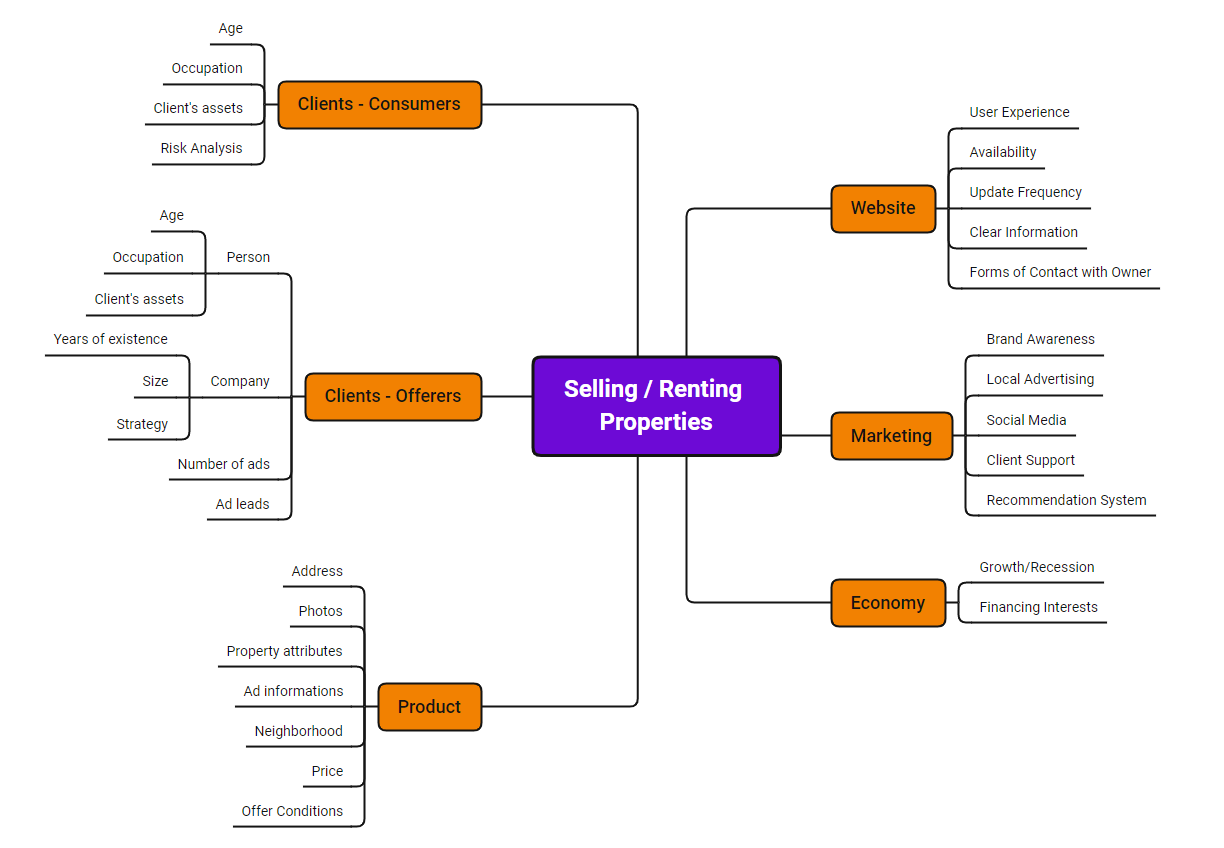

In [57]:
Image('images/hypothesis.png', width=1000)

## 3.2 Creating Hypothesis

1. Properties with full address have 20% less leads on average.
2. Properties with 2 bedrooms have 15% more leads than those with 1 bedroom.
3. Properties with no parking spaces have at least 50% more leads on average.
4. Properties with more than 100m² have at least 10% more leads on average. 
5. Properties that are "kitnet" have at least 25% more leads than "apartment" 
6. Ads created in the last 12 months have at least 30% more leads on average. 
7. Ads on ZAP platform have at least 10% more leads on average.    
8. Properties available for renting have at least 40% more leads on average.

## 3.3 Features Creation

### Adjusting 'leads' as 'qty_leads' and creating 'has_leads' column

In [58]:
# renaming column
df3 = df3.rename(columns={'leads': 'qty_leads'})

# creating new column where '1' means the ad has leads
df3['has_leads'] = df3.apply(lambda x: 1 if x['qty_leads']>0 else 0, axis=1)

df3[['qty_leads', 'has_leads']].head(15)

,qty_leads,has_leads
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
5,0,0
6,0,0
7,2,1
8,0,0
9,0,0


### Adjusting 'display_address_type' as 'address_filling'

In [59]:
# variable given definition: 
    # ALL (exibe todos os campos de endereço);
    # STREET (exibe até a rua do endereço);
    # NEIGHBORHOOD (exibe apenas o bairro do endereço);

In [60]:
# checking data sample
address = df3[['display_address_type', 'city', 'state', 'neighborhood', 'street', 'street_number', 'CEP']]
address.head()

,display_address_type,city,state,neighborhood,street,street_number,CEP
0,STREET,Santo André,São Paulo,Vila Alpina,Rua dos Capuchinhos,243,9090640
1,STREET,São Bernardo do Campo,São Paulo,Parque Neide,Avenida Humberto de Alencar Castelo Branco,111,9850305
2,STREET,Santo André,São Paulo,Vila Bastos,NaN,0,0
3,STREET,São Bernardo do Campo,São Paulo,Centro,Rua Brasílio Machado,926,9715140
4,STREET,Santo André,São Paulo,Centro,Avenida Portugal,639,9041320


In [61]:
# creating new column based on business criteria
df3['address_filling'] = df3[['city', 'state', 'neighborhood', 'street', 'street_number', 'CEP']].apply(lambda x:
                            'ALL' if (
                                                 pd.notna(x['city']) &
                                                 pd.notna(x['state']) &
                                                 pd.notna(x['neighborhood']) &
                                                 pd.notna(x['street']) &
                                                 (x['street_number']!=0) &
                                                 (x['CEP']!=0)                    ) else
                                                                                                        
                            'STREET' if (
                                                 pd.notna(x['city']) &
                                                 pd.notna(x['state']) &
                                                 pd.notna(x['neighborhood']) &
                                                 pd.notna(x['street'])            ) else
                                                                                                        
                            'NEIGHBORHOOD' if ( 
                                                 pd.notna(x['city']) &
                                                 pd.notna(x['state']) &
                                                 pd.notna(x['neighborhood'])      ) else     'other', axis =1)

In [62]:
# droping 'display_address_type'
df3 = df3.drop(columns='display_address_type')

# checking new column
df3[['address_filling', 'city', 'state', 'neighborhood', 'street', 'street_number', 'CEP']].head()

,address_filling,city,state,neighborhood,street,street_number,CEP
0,ALL,Santo André,São Paulo,Vila Alpina,Rua dos Capuchinhos,243,9090640
1,ALL,São Bernardo do Campo,São Paulo,Parque Neide,Avenida Humberto de Alencar Castelo Branco,111,9850305
2,NEIGHBORHOOD,Santo André,São Paulo,Vila Bastos,NaN,0,0
3,ALL,São Bernardo do Campo,São Paulo,Centro,Rua Brasílio Machado,926,9715140
4,ALL,Santo André,São Paulo,Centro,Avenida Portugal,639,9041320


### Creating 'created_timeinmonths'

In [63]:
# creating column
df3['created_timeinmonths'] = (((df3['snapshot_date'] - df3['created_date'])/30).dt.days).astype('int64')
display(df3[['created_date', 'snapshot_date', 'created_timeinmonths']].head())

,created_date,snapshot_date,created_timeinmonths
0,2017-02-28 08:38:33,2019-05-31,27
1,2018-06-19 02:32:15,2019-05-31,11
2,2015-06-30 02:02:48,2019-05-31,47
3,2018-09-07 01:54:42,2019-05-31,8
4,2018-05-24 08:21:39,2019-05-31,12


### Creating 'offer_type'

In [64]:
# given business info:
    # aluguel R$ 900 e R$ 1,500
    # venda R$ 120,000 e mais de R$ 1 milhão

In [65]:
# creating 'offer_type' column according to business criteria
df3['offer_type'] = df3[['price']].apply(lambda x: 'renting' if ( (x['price']>=900) & (x['price']<=1500) ) else
                                                   'selling' if ( (x['price']>=120000) )                   else 'unknown', axis=1 )

In [66]:
# checking properties with 'unknown' status
print('Number of properties classified as "unknown": {:,}.'.format(df3[df3['offer_type']=='unknown'].shape[0]))
print('That represents {:.2%} of the total number of properties.'.format( df3[df3['offer_type']=='unknown'].shape[0] / df3.shape[0] ))

Number of properties classified as "unknown": 10,369.
That represents 4.29% of the total number of properties.


### Reordering columns

In [67]:
df3.columns

Index(['advertiser_id', 'portal', 'bedrooms', 'suites', 'parking_spaces',
       'usable_areas', 'price', 'unit_type', 'state', 'city', 'neighborhood',
       'street', 'street_number', 'CEP', 'created_date', 'created_year',
       'snapshot_date', 'listing_id', 'qty_leads', 'has_leads',
       'address_filling', 'created_timeinmonths', 'offer_type'],
      dtype='object')

In [68]:
# reordering columns
df3 = df3 [[ 'advertiser_id', 'portal', 'bedrooms', 'suites', 'parking_spaces',
            'usable_areas', 'price', 'unit_type', 'offer_type', 'address_filling', 
            'state', 'city', 'neighborhood', 'street', 'street_number', 'CEP',
            'created_date', 'created_year', 'created_timeinmonths', 'snapshot_date', 'listing_id', 'qty_leads', 'has_leads' ]]

df3.head(2)

,advertiser_id,portal,bedrooms,suites,parking_spaces,usable_areas,price,unit_type,offer_type,address_filling,...,street,street_number,CEP,created_date,created_year,created_timeinmonths,snapshot_date,listing_id,qty_leads,has_leads
0,3e7cced6-c11d-4677-a594-6dcfe502faf8,ZAP,2,1,1,57,262910,APARTMENT,selling,ALL,...,Rua dos Capuchinhos,243,9090640,2017-02-28 08:38:33,2017,27,2019-05-31,b35c5dc3516e51b,0,0
1,fd4e2232-9a56-26fc-129e-4469f02a127b,ZAP,2,0,1,65,217722,APARTMENT,selling,ALL,...,Avenida Humberto de Alencar Castelo Branco,111,9850305,2018-06-19 02:32:15,2018,11,2019-05-31,002273b112b26b0,0,0


# 4. EDA

In [69]:
df4 = df3.copy()

In [70]:
num_df4 = df4.select_dtypes(include=['int64','float64'])
cat_df4 = df4.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

## 4.1 Univariate Analysis
    

### 4.1.1 Response Variable - Leads

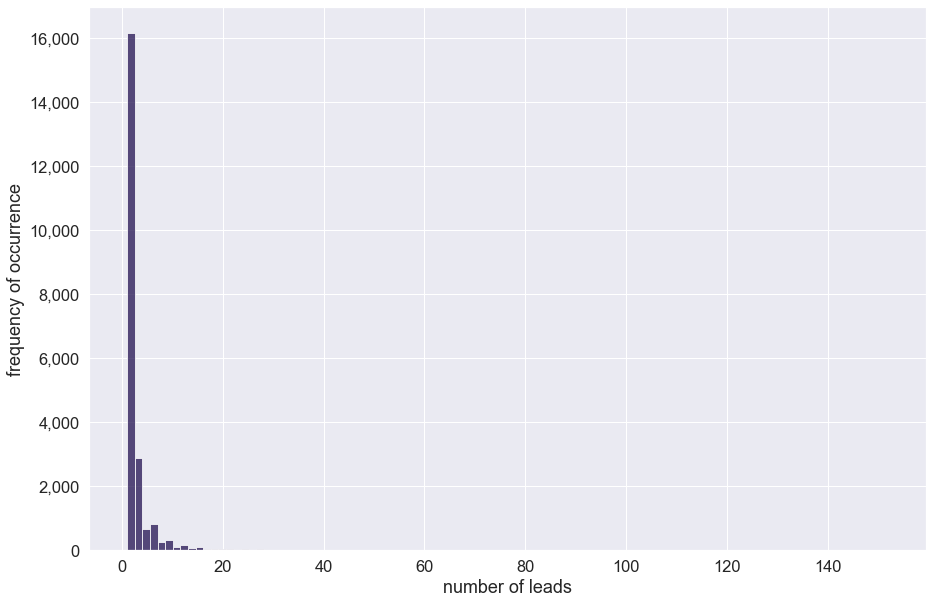

In [71]:
a = sns.histplot(df4[df4['qty_leads']>0], x='qty_leads', bins=100,);
a.set(xlabel="number of leads", ylabel='frequency of occurrence');
a.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
a.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

### 4.1.2 Numerical Variables

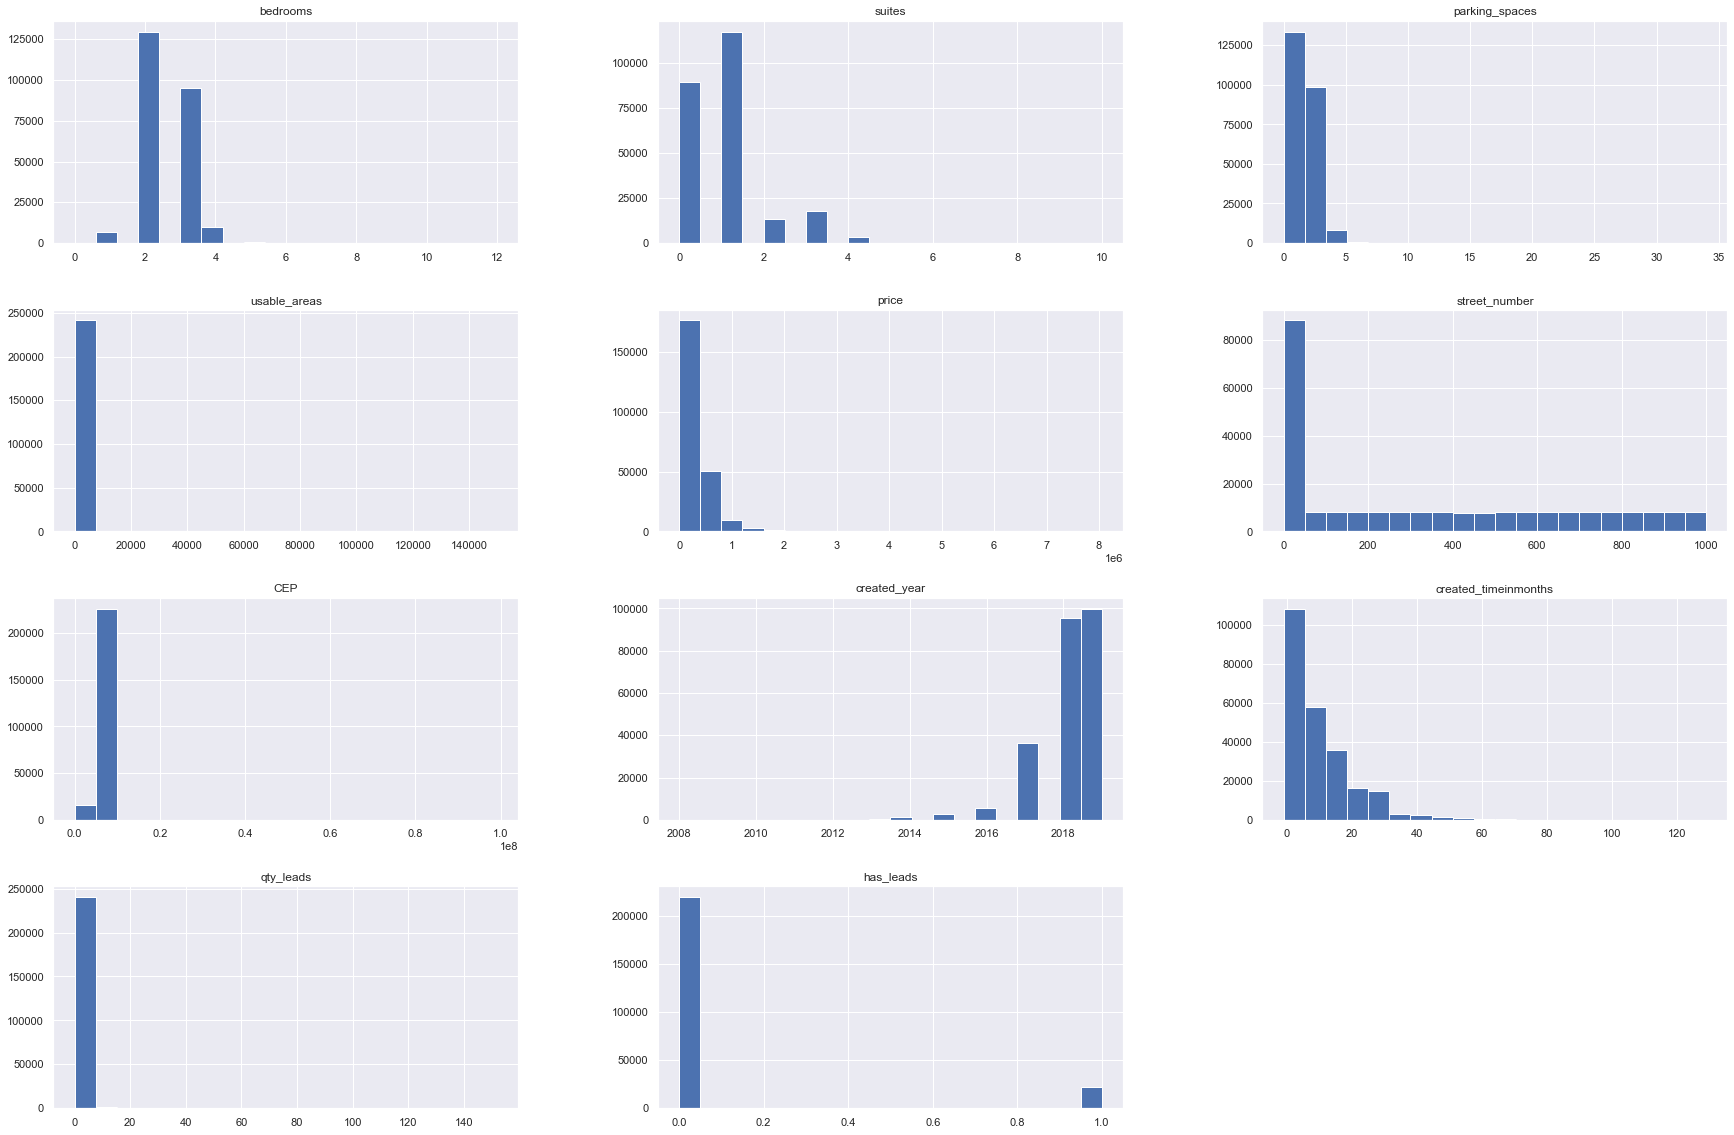

In [72]:
sns.set(rc={'figure.figsize':(30,20)}) # adjusting plot size
num_df4.hist(bins=20);
personal_settings() # resetting personal configurations

### 4.1.3 Categorical Variables

In [73]:
display(cat_df4.head())

,advertiser_id,portal,unit_type,offer_type,address_filling,state,city,neighborhood,street,listing_id
0,3e7cced6-c11d-4677-a594-6dcfe502faf8,ZAP,APARTMENT,selling,ALL,São Paulo,Santo André,Vila Alpina,Rua dos Capuchinhos,b35c5dc3516e51b
1,fd4e2232-9a56-26fc-129e-4469f02a127b,ZAP,APARTMENT,selling,ALL,São Paulo,São Bernardo do Campo,Parque Neide,Avenida Humberto de Alencar Castelo Branco,002273b112b26b0
2,8dc8fb55-64fc-f393-6620-7e74b39c48ee,ZAP,APARTMENT,selling,NEIGHBORHOOD,São Paulo,Santo André,Vila Bastos,NaN,2ced8967651218f
3,22a04bb6-3cea-6e5b-c02b-4352e7bba9cb,ZAP,APARTMENT,renting,ALL,São Paulo,São Bernardo do Campo,Centro,Rua Brasílio Machado,3b68be523cc0716
4,3e7cced6-c11d-4677-a594-6dcfe502faf8,ZAP,APARTMENT,selling,ALL,São Paulo,Santo André,Centro,Avenida Portugal,22aee6e91d6c313


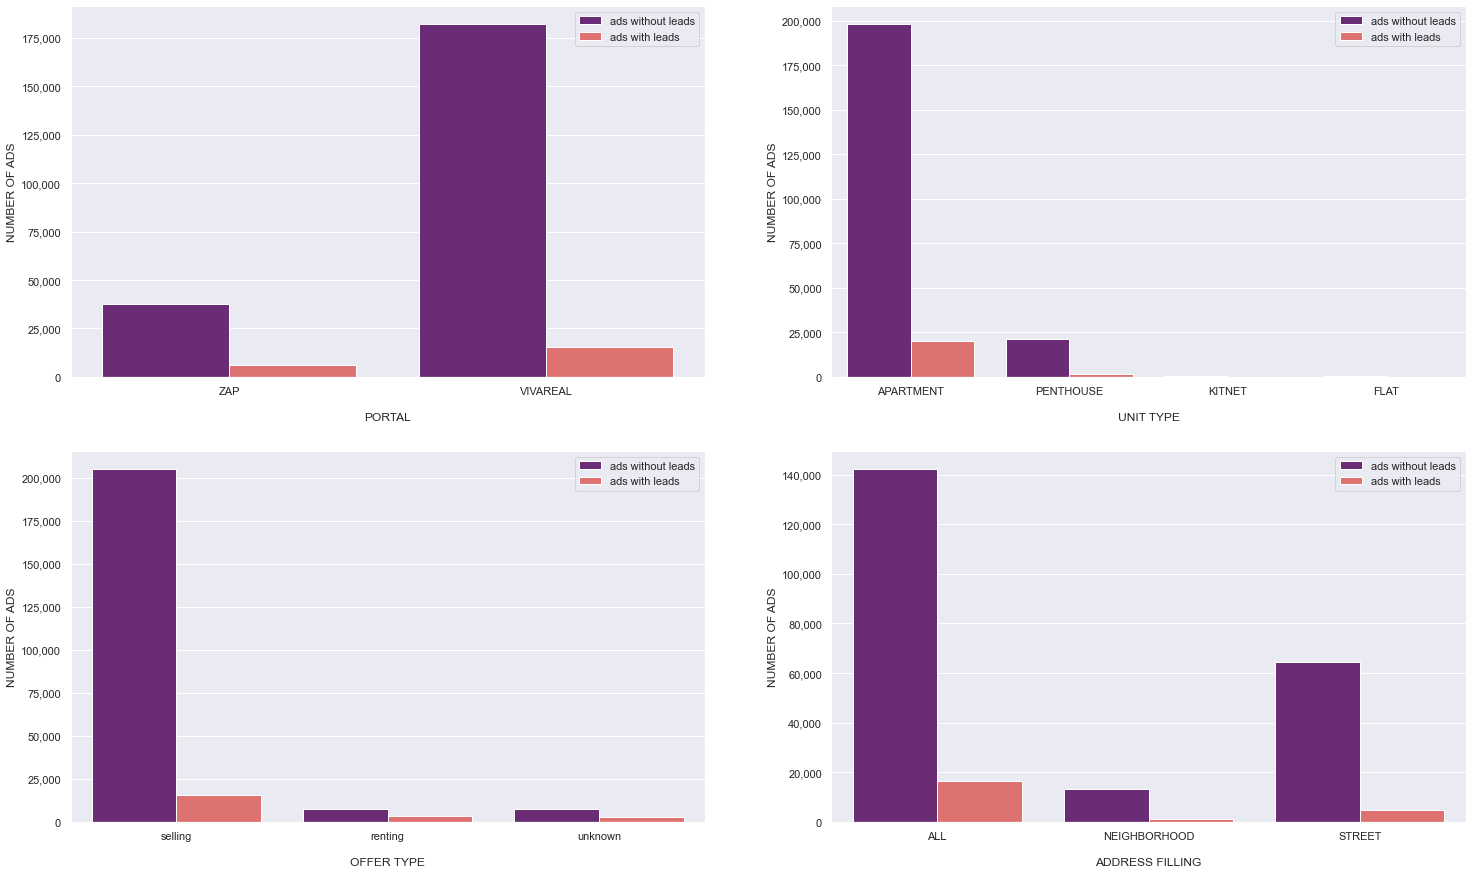

In [74]:
# checking 'has_leads' by 'portal', 'unit_type', 'offer_type', 'address_filling'

sns.set(rc={'figure.figsize':(25,15)}) # adjusting plot size

# 'portal'
plt.subplot(2,2,1)
a = sns.countplot(data=df4, x='portal', palette='magma', hue='has_leads');
a.legend(['ads without leads', 'ads with leads'])
a.set(xlabel="\nPORTAL", ylabel="NUMBER OF ADS");
a.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# 'unit_type'
plt.subplot(2,2,2)
b = sns.countplot(data=df4, x='unit_type', palette='magma', hue='has_leads');
b.legend(['ads without leads', 'ads with leads'])
b.set(xlabel="\nUNIT TYPE", ylabel="NUMBER OF ADS");
b.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# 'offer_type'
plt.subplot(2,2,3)
c = sns.countplot(data=df4, x='offer_type', palette='magma', hue='has_leads');
c.legend(['ads without leads', 'ads with leads'])
c.set(xlabel="\nOFFER TYPE", ylabel="NUMBER OF ADS");
c.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# 'address_filling'
plt.subplot(2,2,4)
d = sns.countplot(data=df4, x='address_filling', palette='magma', hue='has_leads');
d.legend(['ads without leads', 'ads with leads'])
d.set(xlabel="\nADDRESS FILLING", ylabel="NUMBER OF ADS");
d.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

personal_settings() # resetting personal configurations

## 4.2 Bivariate Analysis

In [75]:
df42 = df4.copy()

In [76]:
# hypothesis overview
tab = [ ['Hypothesis', 'Conclusion', 'Analysis'],
        ['H01 Properties with full address have 20% less leads on average.', 'False', 'Properties with full address have 66.52% more leads on average.' ],
        ['H02 Properties with 2 bedrooms have 15% more leads than those with 1 bedroom.', 'False', 'Properties with 2 bedrooms has -147.84% less leads than those with 1.'],
        ['H03 Properties with no parking spaces have at least 50% more leads on average.', 'True', 'Properties without parking spaces have 83.88% more leads on average.'],
        ['H04 Properties with more than 100m² have at least 10% more leads on average.', 'False', 'Properties bigger than 100m² have -27.25% less leads on average.'],
        ['H05 Properties that are "kitnet" have at least 25% more leads than "apartment"', 'True', 'Properties that are "kitnet" have 1298.79% more leads than "apartments".'],
        ['H06 Ads created in the last 12 months have at least 30% more leads on average.', 'True', 'Ads created in the last 12 months have 88.79% more leads on average.'],
        ['H07 Ads on ZAP platform have at least 10% more leads on average.', 'True', 'Ads created in ZAP portal have 55.18% more leads on average.'],
        ['H08 Properties available for renting have at least 40% more leads on average.', 'True', 'Properties available for renting have 515.90% more leads on average.']

      ]

print(tabulate(tab, headers='firstrow', colalign=['left','center','left']))

Hypothesis                                                                       Conclusion   Analysis
------------------------------------------------------------------------------  ------------  ------------------------------------------------------------------------
H01 Properties with full address have 20% less leads on average.                   False      Properties with full address have 66.52% more leads on average.
H02 Properties with 2 bedrooms have 15% more leads than those with 1 bedroom.      False      Properties with 2 bedrooms has -147.84% less leads than those with 1.
H03 Properties with no parking spaces have at least 50% more leads on average.      True      Properties without parking spaces have 83.88% more leads on average.
H04 Properties with more than 100m² have at least 10% more leads on average.       False      Properties bigger than 100m² have -27.25% less leads on average.
H05 Properties that are "kitnet" have at least 25% more leads than "apartment"      Tr

### 4.2.1 Properties with full address have 20% less leads on average.
**False:** Properties with full address have 66.52% more leads on average.

In [77]:
# grouping data
aux = df42[['listing_id', 'has_leads', 'qty_leads', 'address_filling']].copy()

aux['address_status'] = aux.apply(lambda x: 'full address' if (x['address_filling']=='ALL') else 'incomplete address' , axis=1)


a = ( aux.groupby('address_status').agg( qty_ads        = ('listing_id', 'count'),
                                       ads_with_leads = ('has_leads', 'sum'),
                                       qty_leads      = ('qty_leads', 'sum')     ) ).reset_index()

a['leads_ads_%'] = a['qty_leads'] / a['qty_ads'] *100 # creating column that has leads percentage over total number of ads

display(a)


# checking percentage
full_leads = a[a['address_status']=='full address']['leads_ads_%'].values[0] # percentage of leads for ads with full address
incomplete_leads = a[a['address_status']=='incomplete address']['leads_ads_%'].values[0] # percentage of leads for ads with address filled up until street

perncentage = ((full_leads - incomplete_leads) / incomplete_leads)

print('\nProperties with full address have {:.2%} more leads on average.'.format(perncentage))

,address_status,qty_ads,ads_with_leads,qty_leads,leads_ads_%
0,full address,158753,16301,44527,28.05
1,incomplete address,83090,5580,13995,16.84



Properties with full address have 66.52% more leads on average.


### 4.2.2 Properties with 2 bedrooms have 15% more leads than those with 1 bedroom.
**False:** Properties with 2 bedrooms has -147.84% less leads than those with 1 bedroom.

In [78]:
# grouping data
aux = df42[['listing_id', 'has_leads', 'qty_leads', 'bedrooms']].copy()

a = ( aux.groupby('bedrooms').agg( qty_ads        = ('listing_id', 'count'),
                                   ads_with_leads = ('has_leads', 'sum'),
                                   qty_leads      = ('qty_leads', 'sum')     ) ).reset_index()

a['leads_ads_%'] = a['qty_leads'] / a['qty_ads'] *100 # creating column that has leads percentage over total number of ads

display(a.head())


# checking percentage
b2_leads = a[a['bedrooms']==2]['leads_ads_%'].values[0] # percentage of leads for ads with 2 bedrooms
b1_leads = a[a['bedrooms']==1]['leads_ads_%'].values[0] # percentage of leads for ads with 1 bedroom

perncentage = ((b2_leads - b1_leads) / b2_leads)

print('\nProperties with 2 bedrooms has {:.2%} less leads than those with 1 bedroom.'.format(perncentage))

,bedrooms,qty_ads,ads_with_leads,qty_leads,leads_ads_%
0,0,63,2,2,3.17
1,1,6744,1030,4116,61.03
2,2,129697,11424,31938,24.63
3,3,94819,8601,20761,21.90
4,4,9859,788,1628,16.51



Properties with 2 bedrooms has -147.84% less leads than those with 1 bedroom.


### 4.3.3 Properties with no parking spaces have at least 50% more leads on average.
**True:** Properties without parking spaces have 83.88% more leads on average.

In [79]:
# grouping data
aux = df42[['listing_id', 'has_leads', 'qty_leads', 'parking_spaces']].copy()

aux['has_parking'] = aux.apply(lambda x: 'has parking' if ( (x['parking_spaces']>=1) ) else 'no parking', axis=1)


a = ( aux.groupby('has_parking').agg( qty_ads        = ('listing_id', 'count'),
                                      ads_with_leads = ('has_leads', 'sum'),
                                      qty_leads      = ('qty_leads', 'sum')     ) ).reset_index()

a['leads_ads_%'] = a['qty_leads'] / a['qty_ads'] *100 # creating column that has leads percentage over total number of ads

display(a)


# checking percentage
hasparking_leads = a[a['has_parking']=='has parking']['leads_ads_%'].values[0] # percentage of leads for properties that have parking spaces
noparking_leads = a[a['has_parking']=='no parking']['leads_ads_%'].values[0] # percentage of leads for properties taht don't have parking spaces

perncentage = ((noparking_leads - hasparking_leads) / hasparking_leads)

print('\nProperties without parking spaces have {:.2%} more leads on average.'.format(perncentage))

,has_parking,qty_ads,ads_with_leads,qty_leads,leads_ads_%
0,has parking,234491,21046,55332,23.60
1,no parking,7352,835,3190,43.39



Properties without parking spaces have 83.88% more leads on average.


### 4.3.4 Properties with more than 100m² have at least 10% more leads on average.
**False:** Properties bigger than 100m² have -27.25% less leads on average.

In [80]:
# grouping data
aux = df42[['listing_id', 'has_leads', 'qty_leads', 'usable_areas']].copy()

aux['prop_size'] = aux.apply(lambda x: 'more than 100m²' if (x['usable_areas']>100) else 'less than 100m²', axis=1)


a = ( aux.groupby('prop_size').agg( qty_ads        = ('listing_id', 'count'),
                                    ads_with_leads = ('has_leads', 'sum'),
                                    qty_leads      = ('qty_leads', 'sum')     ) ).reset_index()

a['leads_ads_%'] = a['qty_leads'] / a['qty_ads'] *100 # creating column that has leads percentage over total number of ads

display(a)

# checking percentage
morethan100_leads = a[a['prop_size']=='more than 100m²']['leads_ads_%'].values[0] # percentage of leads for properties bigger than 100m²
lessthan100_leads = a[a['prop_size']=='less than 100m²']['leads_ads_%'].values[0] # percentage of leads for properties smaller than 100m²

perncentage = ((morethan100_leads - lessthan100_leads) / lessthan100_leads)

print('\nProperties bigger than 100m² have {:.2%} less leads on average.'.format(perncentage))

,prop_size,qty_ads,ads_with_leads,qty_leads,leads_ads_%
0,less than 100m²,178158,16470,46444,26.07
1,more than 100m²,63685,5411,12078,18.97



Properties bigger than 100m² have -27.25% less leads on average.


### 4.3.5 Properties that are 'kitnet' have at least 25% more leads than 'apartment'.
**True:** Properties that are "kitnet" have 1298.79% more leads than "apartments".

In [81]:
# grouping data
aux = df42[['listing_id', 'has_leads', 'qty_leads', 'unit_type']].copy()

a = ( aux.groupby('unit_type').agg( qty_ads         = ('listing_id', 'count'),
                                    ads_with_leads  = ('has_leads', 'sum'),
                                    qty_leads       = ('qty_leads', 'sum')    )).reset_index()

a['leads_ads_%'] = a['qty_leads'] / a['qty_ads'] *100 # creating column that has leads percentage over total number of ads

display(a)


# checking percentage
kitnet_leads = a[a['unit_type']=='KITNET']['leads_ads_%'].values[0] # percentage of leads for 'kitnet'
apartment_leads = a[a['unit_type']=='APARTMENT']['leads_ads_%'].values[0] # percentage of leads for 'apartment'

perncentage = ((kitnet_leads - apartment_leads) / apartment_leads)

print('\nProperties that are "kitnet" have {:.2%} more leads than "apartments".'.format(perncentage))

,unit_type,qty_ads,ads_with_leads,qty_leads,leads_ads_%
0,APARTMENT,218461,20167,53521,24.50
1,FLAT,484,72,228,47.11
2,KITNET,342,115,1172,342.69
3,PENTHOUSE,22556,1527,3601,15.96



Properties that are "kitnet" have 1298.79% more leads than "apartments".


### 4.3.6 Ads created in the last 12 months have at least 30% more leads on average.
**True:** Ads created in the last 12 months have 88.79% more leads on average.

In [82]:
# grouping data
aux = df42[['listing_id', 'has_leads', 'qty_leads', 'created_timeinmonths']].copy()

aux['created_period'] = aux.apply(lambda x: 'last 12 months' if (x['created_timeinmonths']<=12) else 'more than 12 months ago', axis=1)

a = ( aux.groupby('created_period').agg( qty_ads        = ('listing_id', 'count' ),
                                         ads_with_leads = ('has_leads', 'sum'),
                                         qty_leads      = ('qty_leads', 'sum')      ) ).reset_index()


a['leads_ads_%'] = a['qty_leads'] / a['qty_ads'] *100 # creating column that has leads percentage over total number of ads

display(a)


# checking percentage
last12months_leads = a[a['created_period']=='last 12 months']['leads_ads_%'].values[0] # percentage of leads for ads created in the last 12 months
more12months_leads = a[a['created_period']=='more than 12 months ago']['leads_ads_%'].values[0] # percentage of leads for ads created more than 12 months ago

perncentage = ((last12months_leads - more12months_leads) / more12months_leads)

print('\nAds created in the last 12 months have {:.2%} more leads on average.'.format(perncentage))

,created_period,qty_ads,ads_with_leads,qty_leads,leads_ads_%
0,last 12 months,172321,17314,48218,27.98
1,more than 12 months ago,69522,4567,10304,14.82



Ads created in the last 12 months have 88.79% more leads on average.


### 4.3.7 Ads on ZAP platform have at least 10% more leads on average.
**True:** Ads created in ZAP portal have 55.18% more leads on average.

In [83]:
# grouping data
aux = df42[['listing_id', 'has_leads', 'qty_leads', 'portal']].copy()

a = ( aux.groupby('portal').agg( qty_ads         = ('listing_id', 'count'),
                               ads_with_leads    = ('has_leads', 'sum'),
                               qty_leads         = ('qty_leads', 'sum')     ) ).reset_index()

a['leads_ads_%'] = a['qty_leads'] / a['qty_ads'] *100 # creating column that has leads percentage over total number of ads

display(a)


# checking percentage
zap_leads = a[a['portal']=='ZAP']['leads_ads_%'].values[0] # percentage of leads for ads created in ZAP portal
viva_leads = a[a['portal']=='VIVAREAL']['leads_ads_%'].values[0] # percentage of leads for ads created in VIVAREAL portal

perncentage = ((zap_leads - viva_leads) / viva_leads)

print('\nAds created in ZAP portal have {:.2%} more leads on average.'.format(perncentage))

,portal,qty_ads,ads_with_leads,qty_leads,leads_ads_%
0,VIVAREAL,197778,15587,43487,21.99
1,ZAP,44065,6294,15035,34.12



Ads created in ZAP portal have 55.18% more leads on average.


### 4.3.8 Properties available for renting have at least 40% more leads than properties available for buying.
**True:** Properties available for renting have 515.90% more leads than properties available for buying.

In [84]:
# grouping data
aux = df42[['listing_id', 'has_leads', 'qty_leads', 'offer_type']].copy()

a = ( aux.groupby('offer_type').agg( qty_ads        = ('listing_id', 'count'),
                                     ads_with_leads = ('has_leads', 'sum'),
                                     qty_leads      = ('qty_leads', 'sum')     ) ).reset_index()

a['leads_ads_%'] = a['qty_leads'] / a['qty_ads'] *100 # creating column that has leads percentage over total number of ads

display(a)

# checking percentage
renting_leads = a[a['offer_type']=='renting']['leads_ads_%'].values[0] # percentage of leads for reting properties
selling_leads = a[a['offer_type']=='selling']['leads_ads_%'].values[0] # percentage of leads for selling properties

perncentage = ((renting_leads - selling_leads) / selling_leads)

print('\nProperties available for renting have {:.2%} more leads than properties available for buying.'.format(perncentage))

,offer_type,qty_ads,ads_with_leads,qty_leads,leads_ads_%
0,renting,10476,3138,10565,100.85
1,selling,220998,15785,36187,16.37
2,unknown,10369,2958,11770,113.51



Properties available for renting have 515.90% more leads than properties available for buying.


## 4.3 Multivariate Analysis

In [85]:
df43 = df42.copy()

### 4.3.1 Numerical Attributes

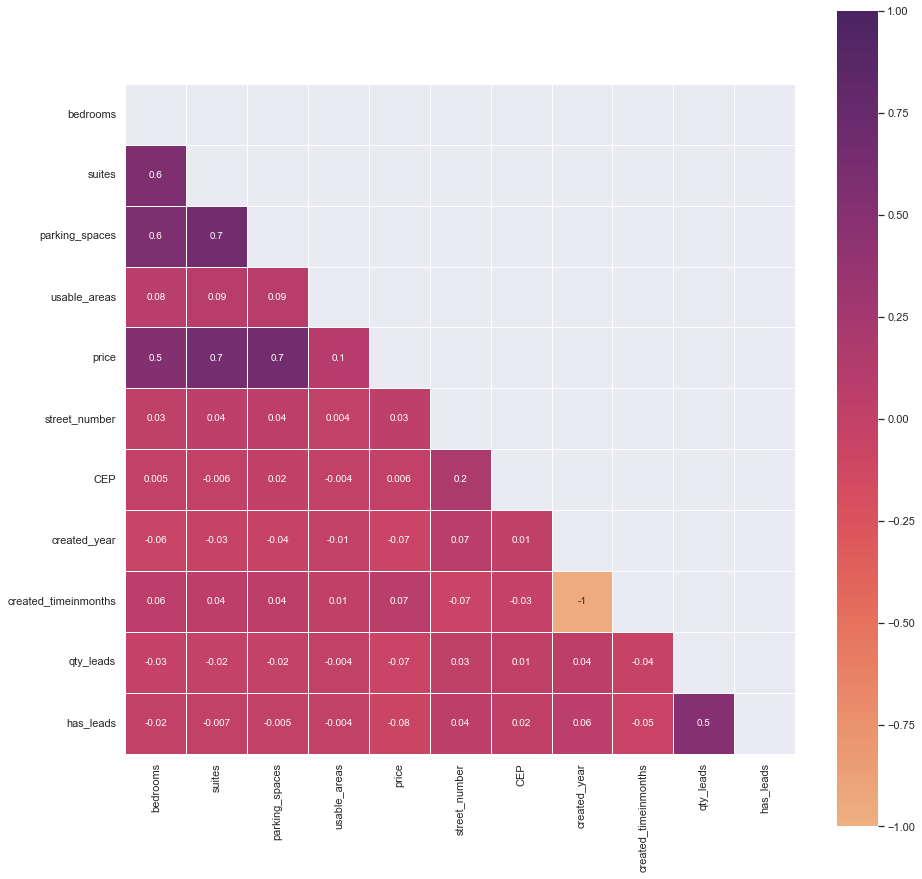

In [86]:
# checking correlation between numerical attributes by using a heatmap

correlation = num_df4.corr(method='pearson')

sns.set(font_scale=1.2)
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(correlation, 
            cmap='flare', 
            annot=True, 
            annot_kws= {'fontsize':'small'},
            fmt='.1g',
            linewidths=0.8, 
            square=True,
            mask=np.triu(correlation),
            vmin=-1, vmax=1);

personal_settings()

In [87]:
# visualizing the same correlation as a simple table
correlation.where( ((correlation <= -0.5) | (correlation >=0.5 )) & (correlation != 1) , other='')

,bedrooms,suites,parking_spaces,usable_areas,price,street_number,CEP,created_year,created_timeinmonths,qty_leads,has_leads
bedrooms,,0.56,0.57,,0.52,,,,,,
suites,0.56,,0.66,,0.65,,,,,,
parking_spaces,0.57,0.66,,,0.66,,,,,,
usable_areas,,,,,,,,,,,
price,0.52,0.65,0.66,,,,,,,,
street_number,,,,,,,,,,,
CEP,,,,,,,,,,,
created_year,,,,,,,,,-0.95,,
created_timeinmonths,,,,,,,,-0.95,,,
qty_leads,,,,,,,,,,,0.51


### 4.3.2 Categorical Attributes

In [88]:
print(cat_df4.shape)
cat_df4.head()

(241843, 10)


,advertiser_id,portal,unit_type,offer_type,address_filling,state,city,neighborhood,street,listing_id
0,3e7cced6-c11d-4677-a594-6dcfe502faf8,ZAP,APARTMENT,selling,ALL,São Paulo,Santo André,Vila Alpina,Rua dos Capuchinhos,b35c5dc3516e51b
1,fd4e2232-9a56-26fc-129e-4469f02a127b,ZAP,APARTMENT,selling,ALL,São Paulo,São Bernardo do Campo,Parque Neide,Avenida Humberto de Alencar Castelo Branco,002273b112b26b0
2,8dc8fb55-64fc-f393-6620-7e74b39c48ee,ZAP,APARTMENT,selling,NEIGHBORHOOD,São Paulo,Santo André,Vila Bastos,NaN,2ced8967651218f
3,22a04bb6-3cea-6e5b-c02b-4352e7bba9cb,ZAP,APARTMENT,renting,ALL,São Paulo,São Bernardo do Campo,Centro,Rua Brasílio Machado,3b68be523cc0716
4,3e7cced6-c11d-4677-a594-6dcfe502faf8,ZAP,APARTMENT,selling,ALL,São Paulo,Santo André,Centro,Avenida Portugal,22aee6e91d6c313


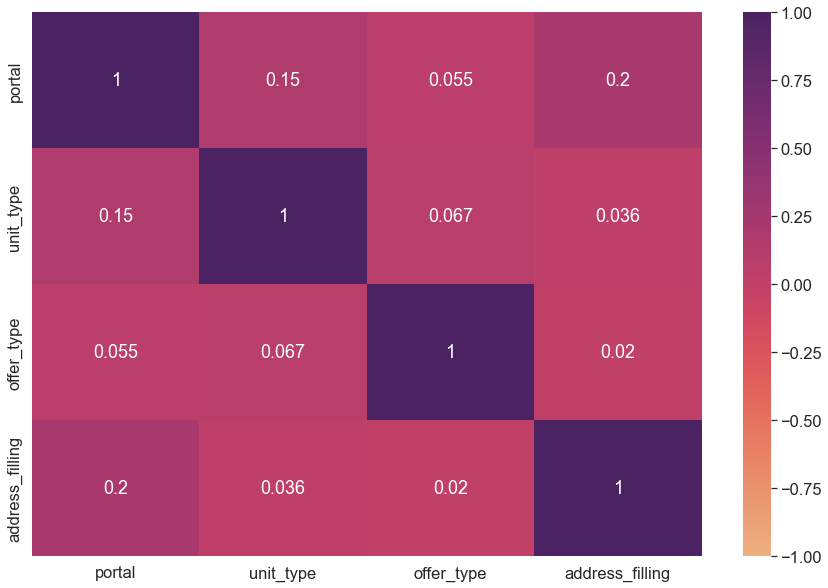

In [89]:
# calculating Cramér's V (formula at Helper Function section)

a1 = cramer_v(cat_df4['portal'], cat_df4['portal'])
a2 = cramer_v(cat_df4['portal'], cat_df4['unit_type'])
a3 = cramer_v(cat_df4['portal'], cat_df4['offer_type'])
a4 = cramer_v(cat_df4['portal'], cat_df4['address_filling'])

a5 = cramer_v(cat_df4['unit_type'], cat_df4['portal'])
a6 = cramer_v(cat_df4['unit_type'], cat_df4['unit_type'])
a7 = cramer_v(cat_df4['unit_type'], cat_df4['offer_type'])
a8 = cramer_v(cat_df4['unit_type'], cat_df4['address_filling'])

a9 = cramer_v(cat_df4['offer_type'], cat_df4['portal'])
a10 = cramer_v(cat_df4['offer_type'], cat_df4['unit_type'])
a11 = cramer_v(cat_df4['offer_type'], cat_df4['offer_type'])
a12 = cramer_v(cat_df4['offer_type'], cat_df4['address_filling'])

a13 = cramer_v(cat_df4['address_filling'], cat_df4['portal'])
a14 = cramer_v(cat_df4['address_filling'], cat_df4['unit_type'])
a15 = cramer_v(cat_df4['address_filling'], cat_df4['offer_type'])
a16 = cramer_v(cat_df4['address_filling'], cat_df4['address_filling'])


# final dataset 
t = pd.DataFrame({ 'portal':          [ a1,  a2,  a3, a4],
                   'unit_type':       [ a5,  a6,  a7, a8],
                   'offer_type':      [ a9,  a10,  a11, a12],
                   'address_filling': [a13, a14, a15, a16]    })
t = t.set_index(t.columns)


sns.heatmap(data=t, cmap='flare', annot=True, vmin=-1, vmax=1);

# 5. Conclusion

In [90]:
df5 = df43.copy()

## Main Hypothesis:
**Ads with incomplete address have a better performance due to the fact that users initiate a contact with the intention of clearing up doubts regarding properties location.**

As seen on EDA section, properties with incomplete address information have less leads.

In [91]:
aux = df5[['listing_id', 'has_leads', 'qty_leads', 'address_filling']].copy()

a = ( aux.groupby('address_filling').agg( qty_ads     = ('listing_id', 'count'),
                                       ads_with_leads = ('has_leads', 'sum'),
                                       qty_leads      = ('qty_leads', 'sum')     ) ).reset_index()

a['leads_ads_%'] = a['qty_leads'] / a['qty_ads'] *100 # creating column that has leads percentage over total number of ads

display(a)

,address_filling,qty_ads,ads_with_leads,qty_leads,leads_ads_%
0,ALL,158753,16301,44527,28.05
1,NEIGHBORHOOD,13983,992,2390,17.09
2,STREET,69107,4588,11605,16.79


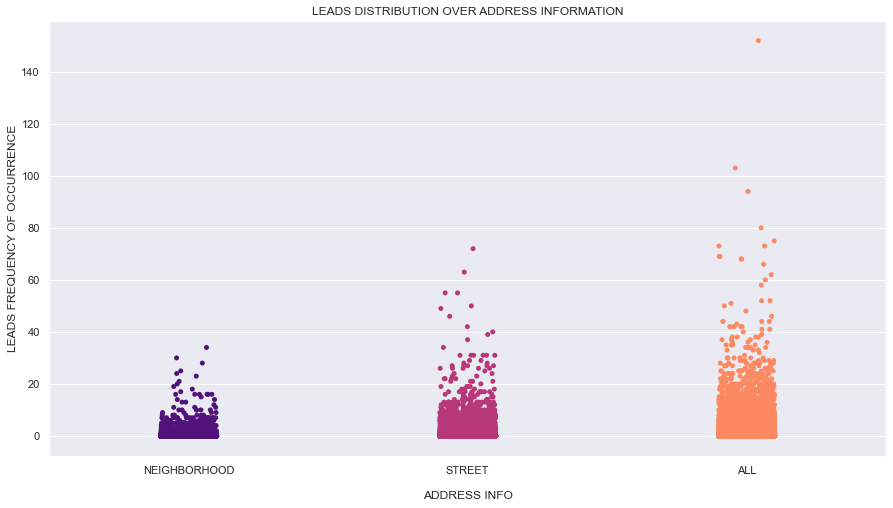

In [92]:
sns.set(rc={'figure.figsize':(15,8)}) # adjusting plot size
a = sns.stripplot(data=df5, x='address_filling', y='qty_leads', order=['NEIGHBORHOOD', 'STREET', 'ALL'], palette='magma');
a.set(xlabel="\nADDRESS INFO", ylabel="LEADS FREQUENCY OF OCCURRENCE", title='LEADS DISTRIBUTION OVER ADDRESS INFORMATION');

## Other Insights

**H06 Ads created in the last 12 months have 88.79% more leads on average.**

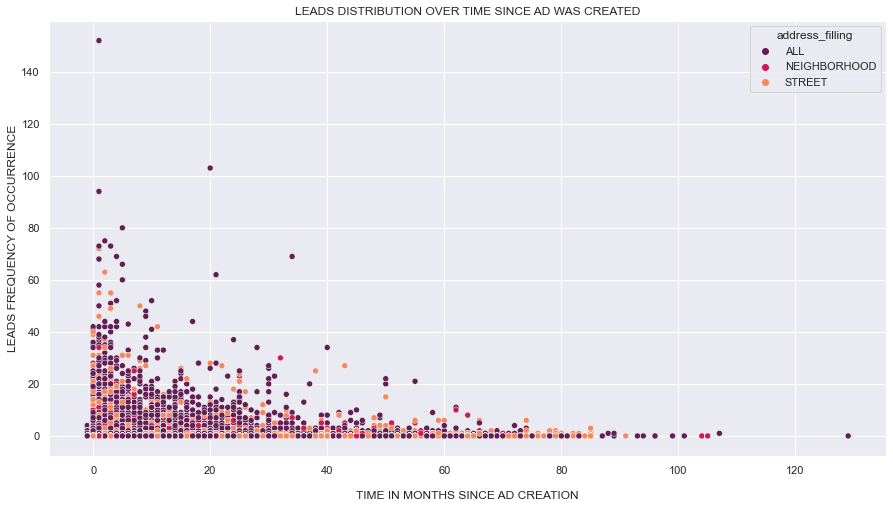

In [93]:
sns.set(rc={'figure.figsize':(15,8)}) # adjusting plot size
a = sns.scatterplot(data=df5, x='created_timeinmonths', y='qty_leads', hue='address_filling', palette='rocket');
a.set(xlabel="\nTIME IN MONTHS SINCE AD CREATION", ylabel="LEADS FREQUENCY OF OCCURRENCE", title='LEADS DISTRIBUTION OVER TIME SINCE AD WAS CREATED');

**H07 Ads created in ZAP portal have 55.18% more leads on average.**

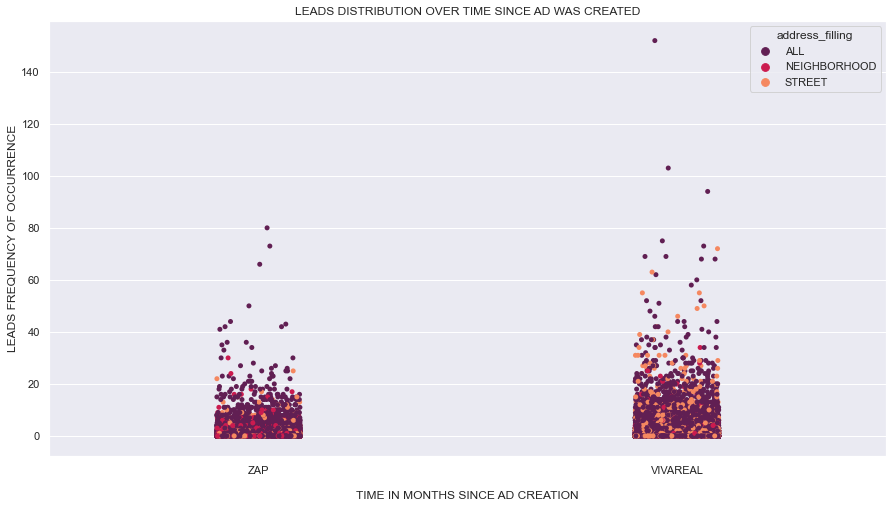

In [94]:
sns.set(rc={'figure.figsize':(15,8)}) # adjusting plot size
a = sns.stripplot(data=df5, x='portal', y='qty_leads', hue='address_filling', palette='rocket');
a.set(xlabel="\nTIME IN MONTHS SINCE AD CREATION", ylabel="LEADS FREQUENCY OF OCCURRENCE", title='LEADS DISTRIBUTION OVER TIME SINCE AD WAS CREATED');

## Next Steps

- Assess if advertiser has the same ad on both platforms. If so, check if these ads have different behavior.
- Understand if ads without full address are actionable. Is there some way to get more data from advertisers?
- Understand parking space inputs bigger than 5. That requires more knowledge regarding business parameters.
- Improve data cleaning.

# Saving dataframes

In [335]:
df5.to_csv('data/listings_processed.csv')